In [1]:
import os
import numpy as np
from abc import ABC, abstractmethod
from jpype import *
import tqdm


In [10]:
# locate jitd jar file
from pathlib import Path
jitd_path = Path.cwd().parent / "infodynamics-dist-1.6.1/infodynamics.jar"
if not os.path.isfile(jitd_path):
    exit(f"infodynamics.jar not found (expected at {os.path.abspath(jitd_path)})")


In [11]:
from utils import import_data

file_path = "D:/SynologyDrive/Drive-Acer/DeepWen/deepwen/home/acercyc/Projects/Drum/data/raw_20241030/output_txt/datahayase1030_1.txt"
data = import_data(file_path)
data.head()

,Time,Hi-hat,Snare drum,Hi-hat (cue),Snare (cue),EMG (right 1),EMG (right 2),EMG (left 1),EMG (left 2)
0,0.0000,-0.000155,-0.000155,0,0,0.017537,0.002744,0.017866,0.004552
1,0.0001,-0.000319,-0.000483,0,0,0.018030,0.003237,0.016222,0.005538
2,0.0002,0.000010,-0.000977,0,0,0.018359,0.003894,0.015236,0.005867
3,0.0003,-0.000155,0.000174,0,0,0.018359,0.003730,0.014579,0.005209
4,0.0004,-0.000319,0.000667,0,0,0.018524,0.003401,0.013592,0.004552


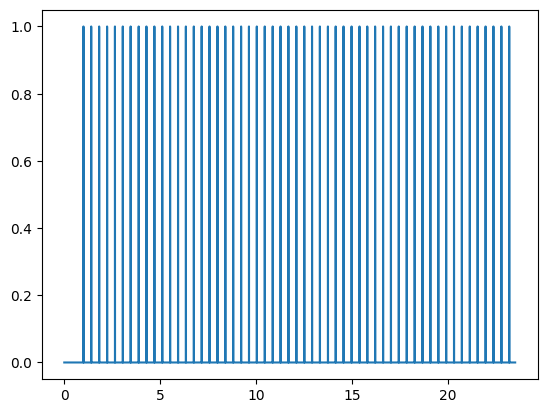

In [19]:
from utils import onset_detection
onsets_array, onset_idx = onset_detection(data['Hi-hat (cue)'], 0.2, minimal_interval=1000)

# plot onset array
import matplotlib.pyplot as plt
plt.plot(data['Time'], onsets_array)
plt.show()

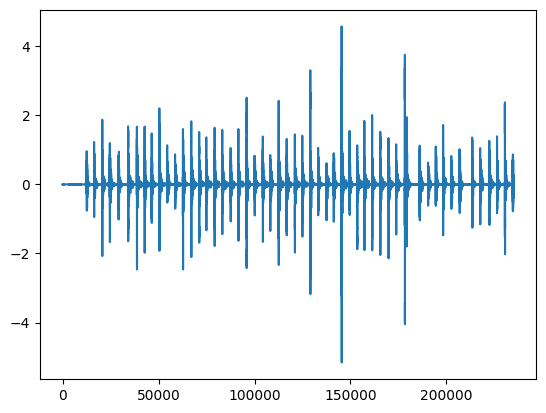

In [16]:
import pandas as pd
def convolve_with_exponential_kernel(data, column, decay_rate):
    """
    Convolve a column with an exponential kernel for smoothing.
    
    Parameters:
    - data (pd.DataFrame): The dataset containing the column.
    - column (str): The name of the column to convolve.
    - decay_rate (float): The decay rate (lambda) for the exponential kernel.
    
    Returns:
    - pd.Series: The convolved column.
    """
    kernel_size = int(1 / decay_rate * 100)  # Ensure kernel size is reasonable
    if kernel_size < 1:
        kernel_size = 1  # Minimum size to avoid empty kernel
    kernel = np.exp(-decay_rate * np.linspace(0, 1, kernel_size))
    kernel /= kernel.sum()  # Normalize kernel to maintain scale

    smoothed_column = np.convolve(data[column], kernel, mode='same')
    return pd.Series(smoothed_column, name=column)